#### 라이브러리 임포트

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### 데이터 로드

In [19]:
CNBC = pd.read_csv("/home/user/exercise_j/GPT Project/AutoDataModify/test/CNBCTESTFinal_classified.csv")
SA = pd.read_csv("/home/user/exercise_j/GPT Project/AutoDataModify/test/SATESTFinal_classified.csv")

In [20]:
CNBC.head()

,Content,date,ticker,sentiment_score
0,Tanaya Macheel 11/11/2023 8:41:31 PMAltcoins...,2023-11-11,BTC,0.7
1,Tanaya Macheel 11/11/2023 8:41:31 PMCrypto r...,2023-11-11,CBOE,0.5
2,Talia Kaplan 11/11/2023 5:15:01 AMEther rise...,2023-11-11,ETH,0.8
3,Tanaya Macheel 11/11/2023 5:00:12 AMSEC chai...,2023-11-11,FTX,0.5
4,MacKenzie Sigalos 11/10/2023 5:00:02 AMCrypt...,2023-11-10,COIN,0.7


In [21]:
SA.head()

,content,date,ticker,sentiment_score
0,... moderate drop from $.77 to $.61. Since the...,2018-05-14,XRP,0.2
1,... make fiat currencies obsolete. As we saw i...,2018-01-05,LTC,0.5
2,... What is Litecoin? Litecoin is one of the m...,2018-01-29,ADA,0.5
3,... removes much of the doubt surrounding many...,2018-01-18,ADA,0.5
4,... well when cryptos do well? How do I ensure...,2018-05-25,BTC,0.5


#### 결측치 제거

In [22]:
missing_values_per_column_CNBC = CNBC.isna().sum()
missing_values_per_column_SA = SA.isna().sum()

print("CNBC 각 열의 결측치 개수:\n", missing_values_per_column_CNBC)
print("SA 각 열의 결측치 개수:\n", missing_values_per_column_SA)

CNBC 각 열의 결측치 개수:
 Content               0
date                568
ticker             1447
sentiment_score     584
dtype: int64
SA 각 열의 결측치 개수:
 content               0
date               2206
ticker             2772
sentiment_score    2210
dtype: int64


In [23]:
CNBC.dropna(subset=['date', 'ticker', 'sentiment_score'], inplace=True)
SA.dropna(subset=['date', 'ticker', 'sentiment_score'], inplace=True)

#### 날짜 오름차순 정렬

In [24]:
CNBC['date'] = pd.to_datetime(CNBC['date'])
SA['date'] = pd.to_datetime(SA['date'])

CNBC.sort_values(by='date', ascending=True, inplace=True)
SA.sort_values(by='date', ascending=True, inplace=True)

In [28]:
CNBC.reset_index(drop=True, inplace=True)
SA.reset_index(drop=True, inplace=True)

In [31]:
CNBC.tail()

,Content,date,ticker,sentiment_score
5852,Tanaya Macheel 11/11/2023 8:41:31 PMCrypto r...,2023-11-11,CBOE,0.5
5853,Ryan Browne 11/11/2023 4:46:48 PMBritain set...,2023-11-11,FTX,0.2
5854,Tanaya Macheel 11/11/2023 5:00:12 AMSEC chai...,2023-11-11,FTX,0.5
5855,Talia Kaplan 11/11/2023 5:15:01 AMEther rise...,2023-11-11,ETH,0.8
5856,Tanaya Macheel 11/11/2023 8:41:31 PMAltcoins...,2023-11-11,BTC,0.7


In [33]:
SA.tail()

,content,date,ticker,sentiment_score
7221,... federal investigation into the abrupt impl...,2106-02-07,FTT-USD,0.2
7222,... new asset choices from an abundance of ETF...,2106-02-07,GROW,0.8
7223,"... Another potential feature, meant to protec...",2106-02-07,SBNY,0.7
7224,... a recession. Taking a substantial leg down...,2106-02-07,COIN,0.0
7225,"... services (P2P, purchase transactions, trad...",2106-02-07,VYGVF,0.8


In [32]:
missing_values_per_column_CNBC = CNBC.isna().sum()
missing_values_per_column_SA = SA.isna().sum()

print("CNBC 각 열의 결측치 개수:\n", missing_values_per_column_CNBC)
print("SA 각 열의 결측치 개수:\n", missing_values_per_column_SA)

CNBC 각 열의 결측치 개수:
 Content            0
date               0
ticker             0
sentiment_score    0
dtype: int64
SA 각 열의 결측치 개수:
 content            0
date               0
ticker             0
sentiment_score    0
dtype: int64


#### 티커 분류

In [34]:
ticker_counts_CNBC = CNBC['ticker'].value_counts()
ticker_counts_SA = SA['ticker'].value_counts()

print(ticker_counts_CNBC)
print(ticker_counts_SA)

ticker
BTC              1433
COIN              351
FTX               278
FB                145
ETH               142
                 ... 
SkyBridge           1
ALGO                1
O'Shares ETFs       1
ABRA                1
CUBI                1
Name: count, Length: 986, dtype: int64
ticker
BTC-USD        758
BTC            586
COIN           556
NVDA           374
AMD            207
              ... 
SLCRW            1
BTC and ETH      1
SCGLY            1
ORC              1
SNOW             1
Name: count, Length: 1076, dtype: int64


In [37]:
# ticker_counts가 1보다 큰 ticker만 필터링
tickers_more_than_one_CNBC = ticker_counts_CNBC[ticker_counts_CNBC > 1].index

# ticker_counts가 1인 ticker만 필터링
tickers_only_one_CNBC = ticker_counts_CNBC[ticker_counts_CNBC == 1].index

print(tickers_more_than_one_CNBC)
print(tickers_only_one_CNBC)

Index(['BTC', 'COIN', 'FTX', 'FB', 'ETH', 'CNBC', 'JPM', 'HOOD', 'Binance',
       'TSLA',
       ...
       'LUNO', 'ATMC', 'HI', 'BYND', 'SMH', 'BIS', 'FRC', 'MBLY', 'F', 'ABNB'],
      dtype='object', name='ticker', length=355)
Index(['Babel Finance', 'Delta Blockchain', 'COIN MSTR', 'Insana', 'CNBCC',
       'ROKU', 'No Ticker', 'CHF', 'O'Leary', 'Glenmede',
       ...
       'R3', 'ADA', 'BANKSY', 'DAO', 'OPENSEA', 'SkyBridge', 'ALGO',
       'O'Shares ETFs', 'ABRA', 'CUBI'],
      dtype='object', name='ticker', length=631)


In [38]:
# ticker_counts가 1보다 큰 ticker만 필터링
tickers_more_than_one_SA = ticker_counts_SA[ticker_counts_SA > 1].index

# ticker_counts가 1인 ticker만 필터링
tickers_only_one_SA = ticker_counts_SA[ticker_counts_SA == 1].index

print(tickers_more_than_one_SA)
print(tickers_only_one_SA)

Index(['BTC-USD', 'BTC', 'COIN', 'NVDA', 'AMD', 'SA', 'PYPL', 'HOOD', 'GBTC',
       'SI',
       ...
       'CIEN', 'GE', 'Fidelity', 'ALGO-USD', 'BNBBTC', 'SPOT', 'FALCX', 'IDA',
       'VOXX', 'VB'],
      dtype='object', name='ticker', length=495)
Index(['SGLB', 'BXCL501', 'Paulson & Company', 'CNBC', 'TUFN', 'LVI', 'GRNQ',
       'LCLP', 'RKOVF', 'FTSE Russell',
       ...
       'BTC-ETH', 'BCHG', 'BTC:USD', 'APIFINY', 'eCYN', 'SLCRW', 'BTC and ETH',
       'SCGLY', 'ORC', 'SNOW'],
      dtype='object', name='ticker', length=581)


##### BTC와 그 외 티커들 통합

In [40]:
CNBC.loc[CNBC['ticker'].str.contains('BTC'), 'ticker'] = 'BTC'
CNBC.loc[CNBC['ticker'].isin(tickers_only_one_CNBC), 'ticker'] = 'others'

SA.loc[SA['ticker'].str.contains('BTC'), 'ticker'] = 'BTC'
SA.loc[SA['ticker'].isin(tickers_only_one_SA), 'ticker'] = 'others'

In [43]:
ticker_counts_CNBC = CNBC['ticker'].value_counts()
ticker_counts_SA = SA['ticker'].value_counts()

a = ticker_counts_CNBC.head(40)
b = ticker_counts_SA.head(40)

print(a)
print(b)

ticker
BTC                  1525
others                629
COIN                  351
FTX                   278
FB                    145
ETH                   142
CNBC                  120
JPM                    99
HOOD                   82
Binance                76
TSLA                   67
NVDA                   67
SEC                    65
XRP                    63
Bitcoin                59
CRYPTO                 53
GS                     50
AAPL                   49
AMD                    42
SI                     36
TWTR                   35
GLXY                   34
SQUAWK BOX EUROPE      33
SQ                     33
S&P 500                32
DOGE                   30
Crypto                 30
PYPL                   30
NFT                    27
MSTR                   27
AMZN                   26
CELH                   25
DOW                    23
crypto                 22
GME                    21
CFTC                   21
AMC                    21
SOL                    20
USDT 

#### 티커의 종류가 매무 많고 각 티커의 데이터의 개수가 충분치 않기에 모두 BTC의 뉴스라고 가정하고(∵ Crypto 카테고리 뉴스) 통합하였습니다.

In [44]:
del CNBC['ticker']
del SA['ticker']

#### 시계열 분포 확인

In [55]:
CNBC['date'] = CNBC['date'].dt.date
SA['date'] = SA['date'].dt.date

In [56]:
Start_date_CNBC = CNBC['date'].min()
End_date_CNBC = CNBC['date'].max()
Start_date_SA = SA['date'].min()
End_date_SA = SA['date'].max()

print("CNBC 뉴스 기간:", Start_date_CNBC,"~", End_date_CNBC)
print("SA 뉴스 기간:", Start_date_SA, "~", End_date_SA)

CNBC 뉴스 기간: 2010-11-30 ~ 2023-11-11
SA 뉴스 기간: 2006-12-14 ~ 2106-02-07


##### SA 데이터셋의 날짜 이상치 (2006년 ~ 2106년) 데이터 필터링

In [90]:
# 2106년과 2006년 데이터 필터링
SA['date'] = pd.to_datetime(SA['date'])
SA = SA[(SA['date'].dt.year != 2106) & (SA['date'].dt.year != 2024) &  ~((SA['date'].dt.year == 2023) & (SA['date'].dt.month == 12)) & (SA['date'].dt.year != 2008) & (SA['date'].dt.year != 2006) & (SA['date'].dt.year != 2007) & (SA['date'].dt.year != 2008)]
SA['date'] = SA['date'].dt.date

In [91]:
Start_date_CNBC = CNBC['date'].min()
End_date_CNBC = CNBC['date'].max()
Start_date_SA = SA['date'].min()
End_date_SA = SA['date'].max()

print("CNBC 뉴스 기간:", Start_date_CNBC,"~", End_date_CNBC)
print("SA 뉴스 기간:", Start_date_SA, "~", End_date_SA)

CNBC 뉴스 기간: 2010-11-30 ~ 2023-11-11
SA 뉴스 기간: 2010-08-08 ~ 2023-11-23


In [92]:
date_counts_CNBC = CNBC['date'].value_counts()
date_counts_SA = SA['date'].value_counts()

print(date_counts_CNBC)
print(date_counts_SA)

date
2021-05-20    32
2022-11-10    31
2022-06-14    30
2022-11-11    29
2021-04-14    27
              ..
2017-05-09     1
2017-05-17     1
2023-09-21     1
2023-10-08     1
2023-10-22     1
Name: count, Length: 1494, dtype: int64
date
2022-11-10    24
2022-05-12    21
2022-11-22    20
2022-11-21    20
2022-06-14    20
              ..
2015-04-21     1
2015-09-03     1
2015-09-22     1
2014-09-08     1
2014-09-22     1
Name: count, Length: 1731, dtype: int64


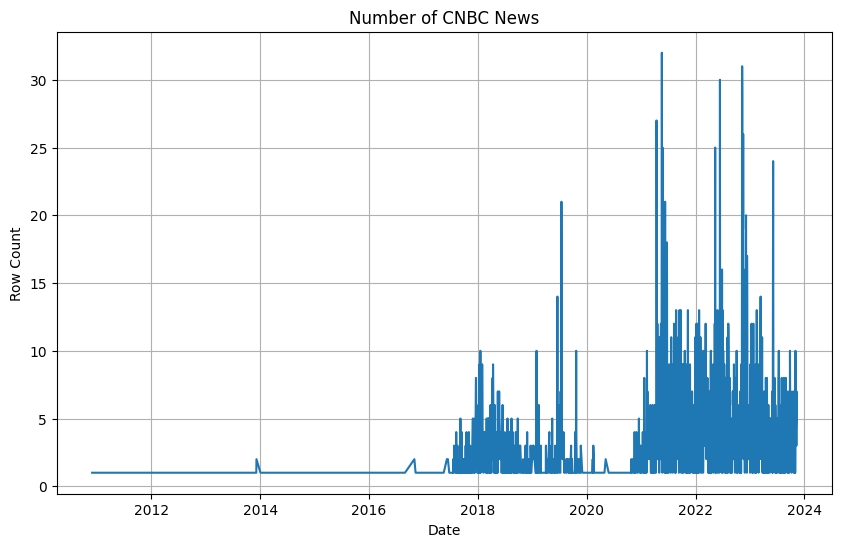

In [93]:
# 날짜별로 그룹화하고 행 개수 세기
count_by_date_CNBC = CNBC.groupby('date').size()

# 시계열 그래프 그리기
plt.figure(figsize=(10,6))
count_by_date_CNBC.plot(kind='line')
plt.title('Number of CNBC News')
plt.xlabel('Date')
plt.ylabel('Row Count')
plt.grid(True)
plt.show()

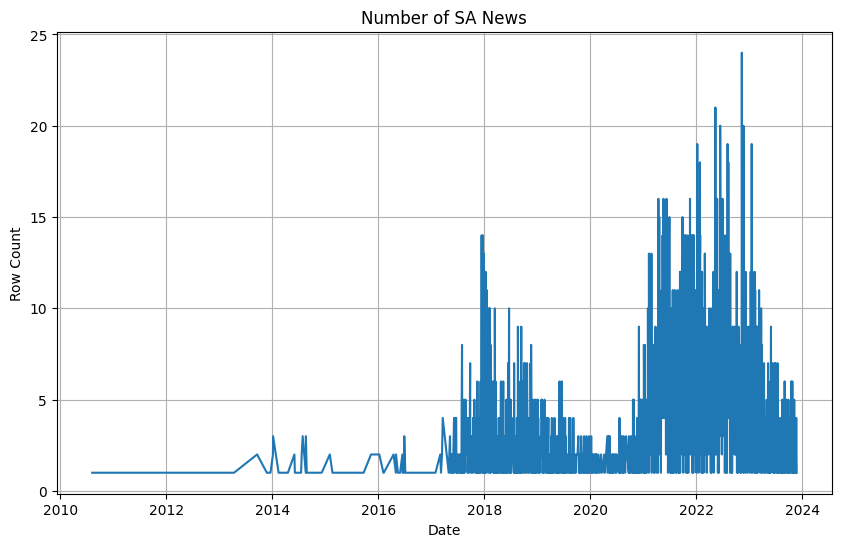

In [94]:
# 날짜별로 그룹화하고 행 개수 세기
count_by_date_SA = SA.groupby('date').size()

# 시계열 그래프 그리기
plt.figure(figsize=(10,6))
count_by_date_SA.plot(kind='line')
plt.title('Number of SA News')
plt.xlabel('Date')
plt.ylabel('Row Count')
plt.grid(True)
plt.show()

#### 감정 분석 데이터셋 비교

SA Category Counts:
 sentiment_category
positive    4691
negative    2483
Name: count, dtype: int64
CNBC Category Counts:
 sentiment_category
positive    3538
negative    2319
Name: count, dtype: int64


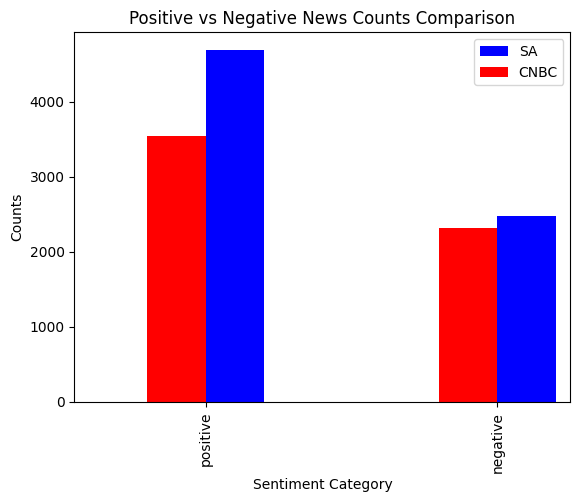

In [95]:
# 'sentiment_score'를 기준으로 'positive'와 'negative'로 분류 (SA)
SA['sentiment_category'] = SA['sentiment_score'].apply(lambda x: 'positive' if x >= 0.5 else 'negative')

# 'sentiment_score'를 기준으로 'positive'와 'negative'로 분류 (CNBC)
CNBC['sentiment_category'] = CNBC['sentiment_score'].apply(lambda x: 'positive' if x >= 0.5 else 'negative')

# 각 카테고리별 개수 계산 (SA)
category_counts_SA = SA['sentiment_category'].value_counts()

# 각 카테고리별 개수 계산 (CNBC)
category_counts_CNBC = CNBC['sentiment_category'].value_counts()

# 결과 확인
print("SA Category Counts:\n", category_counts_SA)
print("CNBC Category Counts:\n", category_counts_CNBC)

# 두 데이터프레임의 결과를 막대 그래프로 비교
fig, ax = plt.subplots()
category_counts_SA.plot(kind='bar', ax=ax, color='blue', position=0, width=0.2, label='SA')
category_counts_CNBC.plot(kind='bar', ax=ax, color='red', position=1, width=0.2, label='CNBC')

plt.title('Positive vs Negative News Counts Comparison')
plt.xlabel('Sentiment Category')
plt.ylabel('Counts')
plt.legend()
plt.show()

#### 감정 분석 데이터셋 시계열 비교

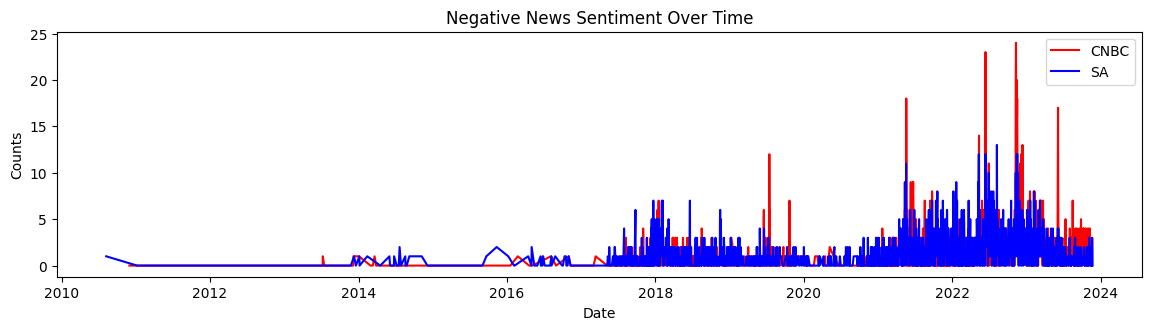

In [96]:
# 날짜별로 그룹화하고 카테고리별 개수 계산
SA_counts = SA.groupby(['date', 'sentiment_category']).size().unstack().fillna(0)
CNBC_counts = CNBC.groupby(['date', 'sentiment_category']).size().unstack().fillna(0)

# 두 데이터셋의 시계열 그래프 그리기
plt.figure(figsize=(14, 7))

# SA 데이터 시계열 그래프
plt.subplot(2, 1, 1)
CNBC_counts['negative'].plot(ax=plt.gca(), color='red', label='CNBC',kind='line')
SA_counts['negative'].plot(ax=plt.gca(), color='blue', label='SA', kind='line')
plt.title('Negative News Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.show()

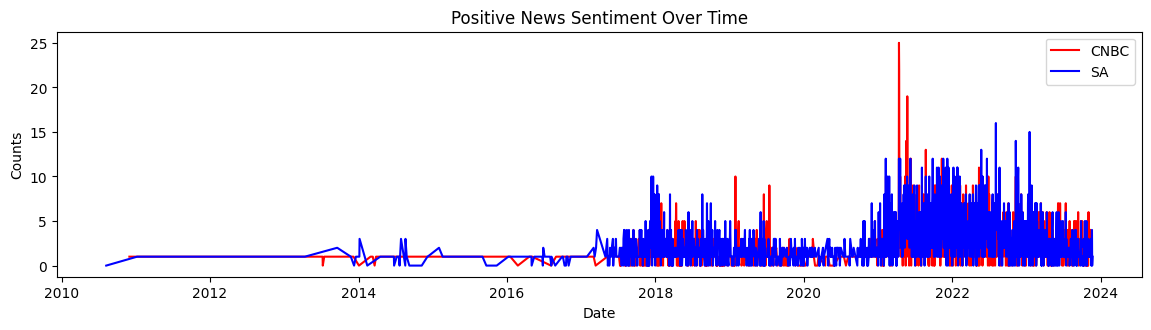

In [97]:
# 두 데이터셋의 시계열 그래프 그리기
plt.figure(figsize=(14, 7))

# SA 데이터 시계열 그래프
plt.subplot(2, 1, 1)
CNBC_counts['positive'].plot(ax=plt.gca(), color='red', label='CNBC',kind='line')
SA_counts['positive'].plot(ax=plt.gca(), color='blue', label='SA', kind='line')
plt.title('Positive News Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.show()

### ECM-LSTM 알고리즘의 ${Q_t}$ 계산을 위한 ${s_t}$ 구하기 : sentiment score를 날짜별로 합산

In [98]:
# 동일 날짜별 'sentiment_score' 합산
datewise_sentiment_sum_CNBC = CNBC.groupby('date')['sentiment_score'].sum()
datewise_sentiment_sum_SA = SA.groupby('date')['sentiment_score'].sum()
# 결과 확인
print(datewise_sentiment_sum_CNBC)
print(datewise_sentiment_sum_SA)

date
2010-11-30    0.5
2011-06-21    0.5
2013-07-08    0.5
2013-07-09    0.2
2013-07-16    0.7
             ... 
2023-11-04    1.6
2023-11-08    2.3
2023-11-09    1.2
2023-11-10    3.2
2023-11-11    2.7
Name: sentiment_score, Length: 1494, dtype: float64
date
2010-08-08    0.2
2011-01-07    0.6
2012-12-17    0.7
2013-04-01    0.6
2013-04-12    0.5
             ... 
2023-11-16    0.5
2023-11-17    0.2
2023-11-20    2.0
2023-11-21    0.6
2023-11-23    0.7
Name: sentiment_score, Length: 1731, dtype: float64
